<a href="https://colab.research.google.com/github/JuliaRS/MachineLearning/blob/master/Rain_in_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain in Australia 
(https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

##### Predict whether or not it will rain tomorrow by training a binary classification model on target Rain Tomorrow

## Content
This dataset contains daily weather observations from numerous Australian weather stations.

Нужно предсказать по погодным данным сегодняшнего дня, будет ли дождь завтра(RainTomorrow)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [0]:
data = pd.read_csv('weatherAUS.csv', engine = 'python')

In [4]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [0]:
print(data.shape)
for col in data.columns:
    print(col)

(142193, 24)
Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RISK_MM
RainTomorrow


**COLUMNS**

* Date - the date when measurements were taken  
* Location - the city where measurements were taken
* MinTemp - minimum temperature
* MaxTemp - maximum temperature
* Rainfall - rainfall measurement  today
* Evaporation - evaporation measurement today
* Sunshine - sunshine measurement today
* WindGustDir - wind gistogram direction
* WindGustSpeed - wind speed
* WindDir9am - wind direction at 9 a.m.
* WindDir3pm - wind direction at 3 p.m.
* WindSpeed9am - wind speed at 9 a.m. 
* WindSpeed3pm - wind speed at 3 p.m.
* Humidity9am - humidity at 9 a.m.
* Humidity3pm - humidity at 3 p.m.
* Pressure9am - pressure at 9 a.m.
* Pressure3pm - pressure at 3 p.m.
* Cloud9am - cloud at 9 a.m.
* Cloud3pm - cloud at 3 p.m.
* Temp9am - temperature at 9 a.m.
* Temp3pm - temperature at 3 p.m.
* RainToday - whether or not it rain today
* RISK_MM - the amount of rainfall in millimeters for the next day
* RainTomorrow - whether or not it rain tomorrow

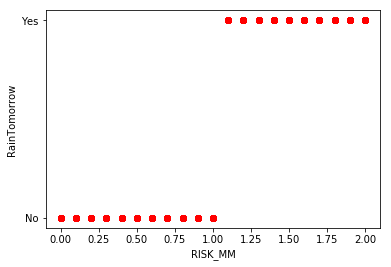

In [0]:
fig = plt.figure()
rain_tommorow = fig.add_subplot(1,1,1)
rain_tommorow.set_ylabel('RainTomorrow')
rain_tommorow.set_xlabel('RISK_MM')
rain_tommorow.plot(data[data['RISK_MM'] <= 2.0]['RISK_MM'], data[data['RISK_MM'] <= 2.0]['RainTomorrow'], 'ro')
pass

RainTomorrow == 'Yes' when RISK_MM > 1.0

RISK_MM is the amount of rainfall in millimeters for the next day. It includes all forms of precipitation that reach the ground, such as rain, drizzle, hail and snow. And it was the column that was used to actually determine whether or not it rained to create the binary target. 

In [0]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


We may notice that there are missing values in all columns.

In [0]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


Notice: 

1) the big correlation between 'MinTemp' and 'Temp9am' (0.901813), between 'MaxTemp' and 'Temp3pm' (0.984562). I think should left only MinTemp and MaxTemp.

2) the big correlation between 'Pressure9am' and 'Pressure3pm' (0.961348). I think should left the one value 'Pressure' as a mean of these.

In [0]:
data.describe(include = ['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2014-01-08,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


In [0]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

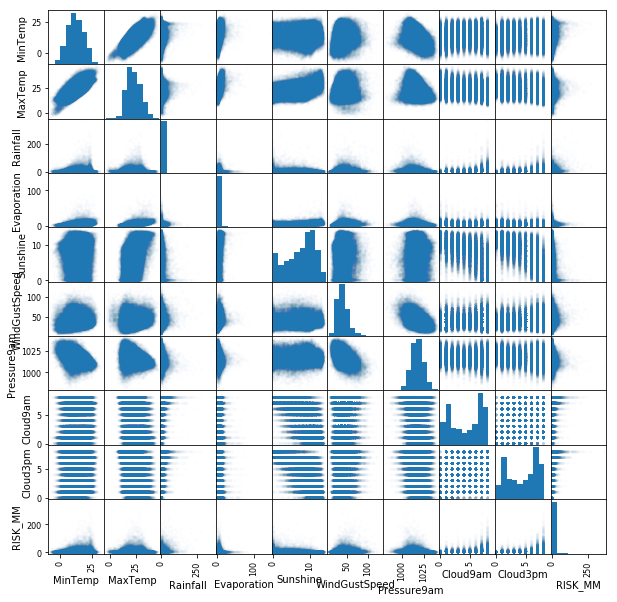

In [0]:
minimum_data = data.drop('Temp9am', axis = 1)\
            .drop('Temp3pm', axis = 1)\
            .drop('WindSpeed9am', axis = 1)\
            .drop('WindSpeed3pm', axis = 1)\
            .drop('Pressure3pm', axis = 1)\
            .drop('Humidity9am', axis = 1)\
            .drop('Humidity3pm', axis = 1)\
            .drop('WindDir3pm', axis = 1)

scatter_matrix(minimum_data, alpha = .01, figsize = (10, 10))
pass

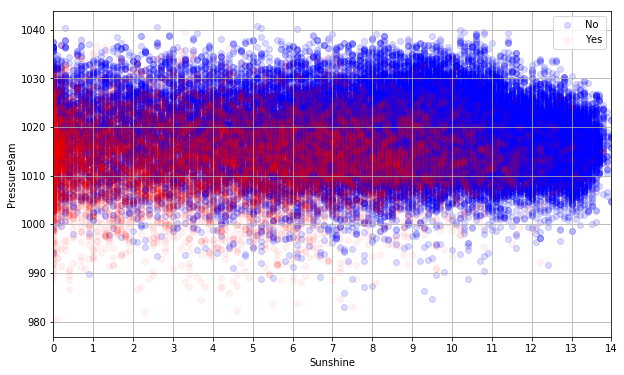

In [0]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['RainTomorrow'] == 'No']['Sunshine'],
            data[data['RainTomorrow'] == 'No']['Pressure9am'],
            alpha = 0.15,
            label = 'No',
            color = 'b')

plt.scatter(data[data['RainTomorrow'] == 'Yes']['Sunshine'],
            data[data['RainTomorrow'] == 'Yes']['Pressure9am'],
            alpha = 0.05,
            label = 'Yes',
            color = 'r')
plt.xlabel('Sunshine')
plt.xticks(range(15))
plt.xlim(0, 14)
plt.ylabel('Pressure9am')
plt.legend()
plt.grid()
pass

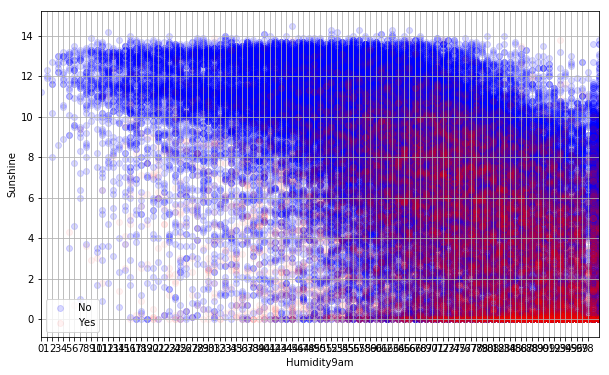

In [0]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['RainTomorrow'] == 'No']['Humidity9am'],
            data[data['RainTomorrow'] == 'No']['Sunshine'],
            alpha = 0.15,
            label = 'No',
            color = 'b')

plt.scatter(data[data['RainTomorrow'] == 'Yes']['Humidity9am'],
            data[data['RainTomorrow'] == 'Yes']['Sunshine'],
            alpha = 0.05,
            label = 'Yes',
            color = 'r')
plt.xlabel('Humidity9am')
plt.xticks(range(99))
plt.xlim(0, 100)
plt.ylabel('Sunshine')
plt.legend()
plt.grid()
pass

## Problem

In [5]:
rainTomorrow = data['RainTomorrow']
data = data.drop('RISK_MM', axis = 1)\
           .drop('Date', axis = 1)\
           .drop('Location', axis = 1)

data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [0]:
data['RainTomorrow'].tail(10)

142183    No
142184    No
142185    No
142186    No
142187    No
142188    No
142189    No
142190    No
142191    No
142192    No
Name: RainTomorrow, dtype: object

## Prepare data

In [7]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [8]:
for c in categorical_columns:
    print(c, data[c].unique())

WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday ['No' 'Yes' nan]
RainTomorrow ['No' 'Yes']


### Prepare missing values

1) I fill missing numerical values as the relevant data or this median.

In [9]:
data.median(axis = 0)

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.5
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
dtype: float64

In [0]:
data['Pressure9am'].fillna(data['Pressure3pm'], axis = 0, inplace = True)
data['Pressure3pm'].fillna(data['Pressure9am'], axis = 0, inplace = True)

data['MinTemp'].fillna(data['Temp9am'], axis = 0, inplace = True)
data['MaxTemp'].fillna(data['Temp3pm'], axis = 0, inplace = True)
data['MinTemp'].fillna(data['Temp3pm'], axis = 0, inplace = True)
data['MaxTemp'].fillna(data['Temp9am'], axis = 0, inplace = True)

data['WindGustSpeed'].fillna(data['WindSpeed9am'], axis = 0, inplace = True)
data['WindGustSpeed'].fillna(data['WindSpeed3pm'], axis = 0, inplace = True)
data['WindSpeed3pm'].fillna(data['WindSpeed9am'], axis = 0, inplace = True)
data['WindSpeed9am'].fillna(data['WindSpeed3pm'], axis = 0, inplace = True)
data['WindSpeed3pm'].fillna(data['WindGustSpeed'], axis = 0, inplace = True)
data['WindSpeed9am'].fillna(data['WindGustSpeed'], axis = 0, inplace = True)

data['Humidity9am'].fillna(data['Humidity3pm'], axis = 0, inplace = True)
data['Humidity3pm'].fillna(data['Humidity9am'], axis = 0, inplace = True)

data['Cloud9am'].fillna(data['Cloud3pm'], axis = 0, inplace = True)
data['Cloud3pm'].fillna(data['Cloud9am'], axis = 0, inplace = True)

In [11]:
data.fillna(data.median(axis = 0), axis = 0, inplace = True)
data[numerical_columns].count(axis = 0)

MinTemp          142193
MaxTemp          142193
Rainfall         142193
Evaporation      142193
Sunshine         142193
WindGustSpeed    142193
WindSpeed9am     142193
WindSpeed3pm     142193
Humidity9am      142193
Humidity3pm      142193
Pressure9am      142193
Pressure3pm      142193
Cloud9am         142193
Cloud3pm         142193
Temp9am          142193
Temp3pm          142193
dtype: int64

2) I fill missing categorical values as the column top.

In [12]:
data[categorical_columns].count(axis = 0)

WindGustDir     132863
WindDir9am      132180
WindDir3pm      138415
RainToday       140787
RainTomorrow    142193
dtype: int64

In [13]:
data[categorical_columns].describe()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,132863,132180,138415,140787,142193
unique,16,16,16,2,2
top,W,N,SE,No,No
freq,9780,11393,10663,109332,110316


In [0]:
data['RainToday'].fillna(data['RainToday'].describe().top, inplace = True)

# fill WindGustDir as WindDir3pm or WindDir9am. If both values are NaN when put a top value of WindGustDir
data['WindGustDir'].fillna(data['WindDir9am'], inplace = True)
data['WindGustDir'].fillna(data['WindDir3pm'], inplace = True)
data['WindGustDir'].fillna(data['WindGustDir'].describe().top, inplace = True)

data = data.drop('WindDir9am', axis = 1)\
           .drop('WindDir3pm', axis = 1)
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

In [15]:
data[categorical_columns].count(axis = 0)

WindGustDir     142193
RainToday       142193
RainTomorrow    142193
dtype: int64

In [16]:
data[categorical_columns].describe()

,WindGustDir,RainToday,RainTomorrow
count,142193,142193,142193
unique,16,2,2
top,W,No,No
freq,12057,110738,110316


### Vectorization

In [17]:
binary_columns    = [col for col in categorical_columns if data[col].describe().unique()[1] == 2]
nonbinary_columns = [col for col in categorical_columns if data[col].describe().unique()[1] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['WindGustDir']


1) Binary columns

In [18]:
data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
data.at[data['RainToday'] == 'No', 'RainToday'] = 0
data.at[data['RainToday'] == 'Yes', 'RainToday'] = 1
data['RainToday'].describe()

count    142193.000000
mean          0.221213
std           0.415065
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RainToday, dtype: float64

2) Nonbinary columns

In [20]:
data[nonbinary_columns].head(20)

,WindGustDir
0,W
1,WNW
2,WSW
3,NE
4,W
5,WNW
6,W
7,W
8,NNW
9,W


In [21]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW'],
      dtype='object')


In [22]:
len(data_nonbinary.columns)

16

### Exclude big correlations

If some values strongly correlate with each other, a fundamental problem arises in the calculations for learning algorithms.

1) the big correlation between 'MinTemp' and 'Temp9am' (0.901813), between 'MaxTemp' and 'Temp3pm' (0.984562). I think should left only MinTemp and MaxTemp.

2) the big correlation between 'Pressure9am' and 'Pressure3pm' (0.961348). I think should left the one value 'Pressure' as a mean of these.

In [23]:
data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,W,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,No
1,7.4,25.1,0.0,4.8,8.5,WNW,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,No
2,12.9,25.7,0.0,4.8,8.5,WSW,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,No
3,9.2,28.0,0.0,4.8,8.5,NE,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,No
4,17.5,32.3,1.0,4.8,8.5,W,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,No
5,14.6,29.7,0.2,4.8,8.5,WNW,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,No
6,14.3,25.0,0.0,4.8,8.5,W,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,1.0,18.1,24.6,0,No
7,7.7,26.7,0.0,4.8,8.5,W,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,No
8,9.7,31.9,0.0,4.8,8.5,NNW,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0,Yes
9,13.1,30.1,1.4,4.8,8.5,W,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,1,No


In [24]:
data['Pressure9am'] = (data['Pressure9am']+data['Pressure3pm']) / 2
data = data.rename(columns={'Pressure9am':'Pressure'})
data = data.drop('Temp9am', axis = 1)\
           .drop('Temp3pm', axis = 1)\
           .drop('Pressure3pm', axis = 1)

numerical_columns   = [c for c in data.columns if (data[c].dtype.name != 'object' and c != 'RainToday')]
data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,W,44.0,20.0,24.0,71.0,22.0,1007.40,8.0,8.0,0,No
1,7.4,25.1,0.0,4.8,8.5,WNW,44.0,4.0,22.0,44.0,25.0,1009.20,5.0,5.0,0,No
2,12.9,25.7,0.0,4.8,8.5,WSW,46.0,19.0,26.0,38.0,30.0,1008.15,2.0,2.0,0,No
3,9.2,28.0,0.0,4.8,8.5,NE,24.0,11.0,9.0,45.0,16.0,1015.20,5.0,5.0,0,No
4,17.5,32.3,1.0,4.8,8.5,W,41.0,7.0,20.0,82.0,33.0,1008.40,7.0,8.0,0,No
5,14.6,29.7,0.2,4.8,8.5,WNW,56.0,19.0,24.0,55.0,23.0,1007.30,5.0,5.0,0,No
6,14.3,25.0,0.0,4.8,8.5,W,50.0,20.0,24.0,49.0,19.0,1008.90,1.0,1.0,0,No
7,7.7,26.7,0.0,4.8,8.5,W,35.0,6.0,17.0,48.0,19.0,1011.75,5.0,5.0,0,No
8,9.7,31.9,0.0,4.8,8.5,NNW,80.0,7.0,28.0,42.0,9.0,1006.25,5.0,5.0,0,Yes
9,13.1,30.1,1.4,4.8,8.5,W,28.0,15.0,11.0,58.0,27.0,1006.35,5.0,5.0,1,No


In [25]:
numerical_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure',
 'Cloud9am',
 'Cloud3pm']

### Normalization of numerical columns

In [26]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure,Cloud9am,Cloud3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.204263,23.221370,2.326738,5.183213,8.042236,38.255146,14.019572,18.564367,68.825294,51.841525,1016.450099,4.632092,4.667248
std,6.409410,7.116909,8.426426,3.185401,2.769638,15.007667,8.895011,8.868022,19.004062,20.828062,6.654115,2.343089,2.226775
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,979.750000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,30.000000,7.000000,13.000000,57.000000,37.000000,1012.300000,3.000000,3.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,37.000000,13.000000,19.000000,70.000000,52.000000,1016.400000,5.000000,5.000000
75%,16.900000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,66.000000,1020.550000,6.000000,6.000000
max,39.600000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,130.000000,100.000000,100.000000,1040.050000,9.000000,9.000000


In [27]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure,Cloud9am,Cloud3pm
count,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,2.720346e-14,-3.269299e-15,-2.880211e-14,-1.051970e-12,5.161279e-14,5.588591e-15,-1.036480e-14,1.614747e-14,4.871905e-15,-1.417907e-16,-1.553559e-11,-3.920902e-14,-2.648654e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.230292e+00,-3.937295e+00,-2.761239e-01,-1.627177e+00,-2.903714e+00,-2.549040e+00,-1.576116e+00,-2.093406e+00,-3.621610e+00,-2.489023e+00,-5.515399e+00,-1.976917e+00,-2.095968e+00
25%,-7.183598e-01,-7.477079e-01,-2.761239e-01,-3.714486e-01,5.696187e-02,-5.500619e-01,-7.891583e-01,-6.274642e-01,-6.222509e-01,-7.125735e-01,-6.236891e-01,-6.965556e-01,-7.487277e-01
50%,-3.186916e-02,-8.730890e-02,-2.761239e-01,-1.203029e-01,1.652793e-01,-8.363366e-02,-1.146229e-01,4.912406e-02,6.181343e-02,7.608713e-03,-7.529045e-03,1.570186e-01,1.494322e-01
75%,7.326318e-01,6.995495e-01,-2.049193e-01,6.805643e-02,2.374909e-01,5.160598e-01,5.599125e-01,6.129476e-01,7.458777e-01,6.797788e-01,6.161452e-01,5.838057e-01,5.985122e-01
max,4.274300e+00,3.495707e+00,4.375203e+01,4.389299e+01,2.331628e+00,6.446362e+00,1.303882e+01,1.256601e+01,1.640423e+00,2.312192e+00,3.546663e+00,1.864167e+00,1.945752e+00


### Join in one data

In [28]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
print(data.columns)

(142193, 31)
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure', 'Cloud9am', 'Cloud3pm', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [29]:
data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure,Cloud9am,Cloud3pm,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,RainToday,RainTomorrow
0,0.186560,-0.045156,-0.204919,-0.120303,0.165279,0.382795,0.672335,0.612948,0.114434,-1.432756,-1.360076,1.437380,1.496672,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No
1,-0.749564,0.263967,-0.276124,-0.120303,0.165279,0.382795,-1.126426,0.387418,-1.306315,-1.288719,-1.089566,0.157019,0.149432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,No
2,0.108549,0.348273,-0.276124,-0.120303,0.165279,0.516060,0.559913,0.838477,-1.622037,-1.048659,-1.247363,-1.123343,-1.197808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,No
3,-0.468727,0.671447,-0.276124,-0.120303,0.165279,-0.949858,-0.339468,-1.078523,-1.253695,-1.720829,-0.187869,0.157019,0.149432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,No
4,0.826244,1.275642,-0.157450,-0.120303,0.165279,0.182897,-0.789158,0.161889,0.693257,-0.904622,-1.209793,1.010593,1.496672,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No
5,0.373784,0.910315,-0.252389,-0.120303,0.165279,1.182386,0.559913,0.612948,-0.727492,-1.384744,-1.375104,0.157019,0.149432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,No
6,0.326978,0.249916,-0.276124,-0.120303,0.165279,0.782590,0.672335,0.612948,-1.043214,-1.576792,-1.134651,-1.550130,-1.646888,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No
7,-0.702758,0.488784,-0.276124,-0.120303,0.165279,-0.216899,-0.901581,-0.176405,-1.095834,-1.576792,-0.706345,0.157019,0.149432,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No
8,-0.390717,1.219438,-0.276124,-0.120303,0.165279,2.781569,-0.789158,1.064007,-1.411556,-2.056914,-1.532901,0.157019,0.149432,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Yes
9,0.139754,0.966519,-0.109980,-0.120303,0.165279,-0.683327,0.110222,-0.852994,-0.569631,-1.192695,-1.517873,0.157019,0.149432,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,No


## Data separation on train and test

In [30]:
X = data.drop('RainTomorrow', axis = 1)
Y = data['RainTomorrow']

feature_names = X.columns
print(feature_names)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure', 'Cloud9am', 'Cloud3pm', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'RainToday'],
      dtype='object')


In [31]:
X = X.to_numpy()
Y = np.array(Y != 'No', dtype='int')
Y

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
print(X.shape)
print(Y.shape)
N, col = X.shape

(142193, 30)
(142193,)


In [0]:
type(X)

numpy.ndarray

In [0]:
type(Y)

numpy.ndarray

In [0]:
rainTomorrow.shape

(142193,)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 27)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

99535 42658


## Train

### Knn

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
nnb = [1, 3, 5, 7, 21, 31, 50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.15790425478474912 31


The best KNeighborsClassifier is classifier with 31 neighbours

In [33]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.1493444517004069 0.15687561535936986


In [0]:
err_test = 1 - knn.score(X_test, y_test)
print(err_test)

0.15711003797646395


err_train < err_test. It happens because of algorithm trained on training sample. Error is 15,7% for rain prediction. 

### SVC

In [0]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.15046968403074296 0.15314829574757371


### Random Forest

In [42]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

8.037373788114734e-05 0.14820197852688827


In [0]:
np.sum(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importance:")

for f in indices:
    if f != 30:
      print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[int(f)], importances[int(f)]))

Feature importance:
10. feature 'Humidity3pm' (0.182993)
11. feature 'Pressure' (0.087911)
 6. feature 'WindGustSpeed' (0.074168)
 9. feature 'Humidity9am' (0.071284)
 2. feature 'MaxTemp' (0.070489)
 1. feature 'MinTemp' (0.069733)
 5. feature 'Sunshine' (0.063747)
 3. feature 'Rainfall' (0.056782)
 8. feature 'WindSpeed3pm' (0.048807)
 7. feature 'WindSpeed9am' (0.046236)
13. feature 'Cloud3pm' (0.040726)
 4. feature 'Evaporation' (0.037241)
12. feature 'Cloud9am' (0.029686)
14. feature 'WindGustDir_E' (0.022261)
28. feature 'WindGustDir_WNW' (0.005962)
22. feature 'WindGustDir_S' (0.005927)
18. feature 'WindGustDir_NE' (0.005787)
21. feature 'WindGustDir_NW' (0.005148)
23. feature 'WindGustDir_SE' (0.005136)
29. feature 'WindGustDir_WSW' (0.005128)
26. feature 'WindGustDir_SW' (0.004840)
27. feature 'WindGustDir_W' (0.004826)
30. feature 'RainToday' (0.004773)
24. feature 'WindGustDir_SSE' (0.004725)
20. feature 'WindGustDir_NNW' (0.004708)
19. feature 'WindGustDir_NNE' (0.004636)
2

Можно заметить, что больше всего вклад в предсказывание вносит влажность воздуха в три вечера(Humidity3pm) и давление, что довольно логично. 

### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
err_train = np.mean(y_train != dtc.predict(X_train))
err_test  = np.mean(y_test  != dtc.predict(X_test))

print(err_train, err_test)

8.037373788114734e-05 0.22080266304093019


### AdaBoost

In [0]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.15389561460792686 0.15708659571475456


Таким образом:
* наихудший результат 22%, применяя алгоритм Decision Tree 15,7;
* 15,7% - Knn, AdaBoost;
* 15,3% - SVM;
* 14,7% - Random Forest.

Random Forest лучше всего работает на наших данных из-за того что, он использует большое число решающих деревьев, которые по отдельности дают не лучший результат(напримр наш Decision Tree Classifier даёт ошибку 22%), но в совокупности даёт хороший результат для задач класификации.

## Principal Component Analysis

способ уменьшения размерности данных с целью увелечения скорости работы алгоритмов на данных при условии потери наименьшего количества информации

In [0]:
print("Number of features {}".format(len(feature_names)))
print(feature_names)

Number of features 30
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure', 'Cloud9am', 'Cloud3pm', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'RainToday'],
      dtype='object')


Размерность нашего пространства 30. Для ускорения алгоритма попробуем понизить размерность данных до 2. 

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_сomponents = pca.fit_transform(X)

In [35]:
principal_df = pd.DataFrame(data = principal_сomponents, columns = ['component 1', 'component 2'])
principal_df.head(10)

,component 1,component 2
0,0.149471,1.655080
1,1.040002,-0.186343
2,2.437590,0.278645
3,0.988521,-1.356957
4,0.183126,1.022180
5,1.792547,1.326866
6,2.676367,0.021788
7,0.962038,-0.749025
8,2.397919,1.413655
9,1.013438,-0.096218


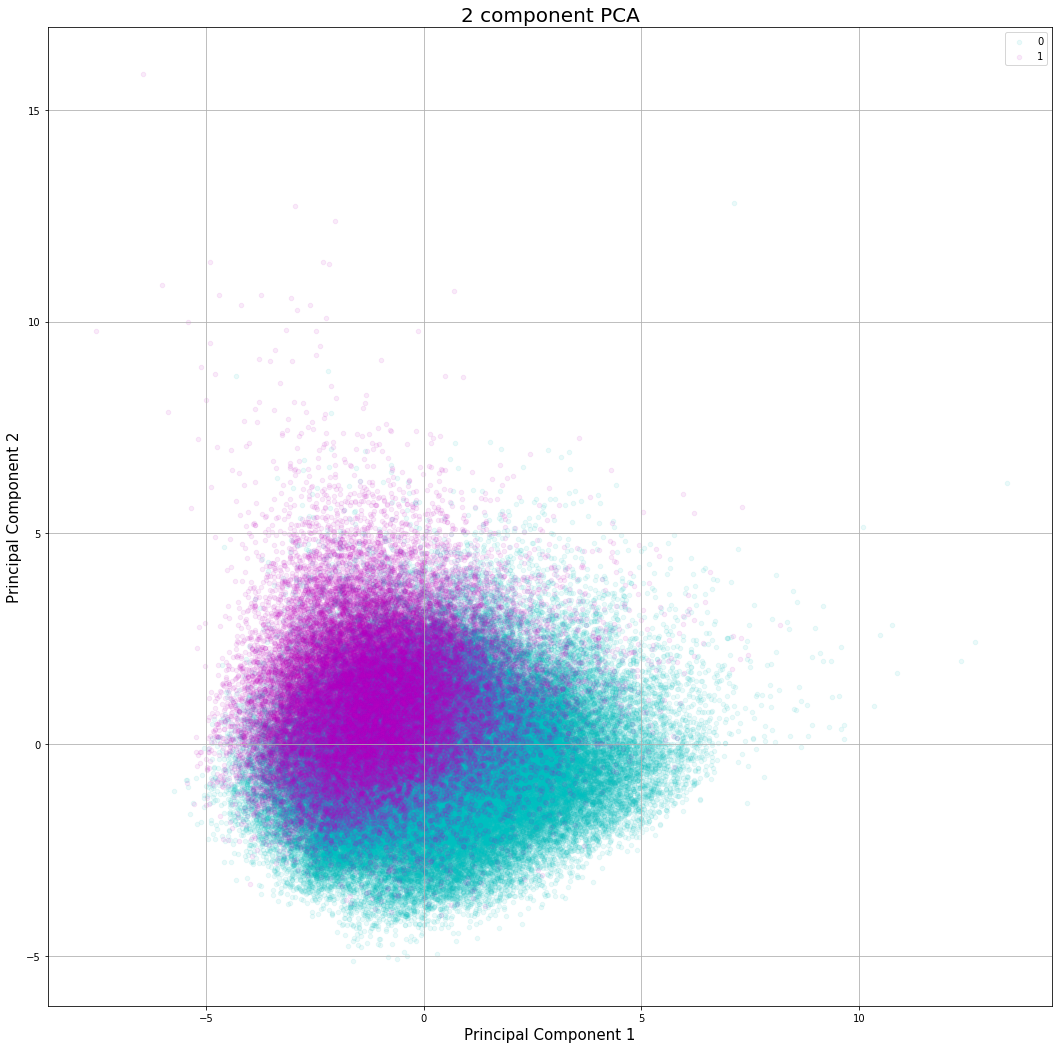

In [0]:
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = range(2)
colors = ['c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = Y == target
    ax.scatter(principal_df.loc[indicesToKeep, 'component 1'], 
               principal_df.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 20,
               alpha = 0.08)
ax.legend(targets)
ax.grid()

### Explained variance ratio
(доли объяснённой дисперсии)

In [0]:
explained_variance_ratio = pca.explained_variance_ratio_ 
names = ['principal component 1', 'principal component 2']
for name, var_ratio in zip(names, explained_variance_ratio):
    print('{}: {}%'.format(name, var_ratio * 100))
print('information sum: {}%'.format(sum(explained_variance_ratio) * 100))

principal component 1: 25.74804939139122%
principal component 2: 18.693492146072998%
information sum: 44.44154153746422%


Суммарная доля информации при уменьшени размерностис 30 до 2 составляет 44% -- это очень мало. Значит при уменьшении размерности на наших данных потерялось оченьмного инфомации.

Ожидаемо, что на таких данных скорее всего ошибка на тестовой выборке будет больше, чем до уменьшения размерности.

### PCA with Classifiers

In [0]:
X_2_train = pca.fit_transform(X_train)
X_2_test = pca.fit_transform(X_test)

#### Random Forest

До уменьшения размерности наилучший результат на наших данных показал классификатор RandomForest. Сначала проверим его на данных с меньшей размерности, затем будем проверять на алгоритма по увелечению ошибки.

**До уменьшения размерности:**

train_err: 8.037373788114734e-05 

test_err:  0.14768624876928127

In [0]:
print("RandomForestClassifier with PCA")
print("\n")
rf.fit(X_2_train, y_train)

err_2_train = np.mean(y_train != rf.predict(X_2_train))
err_2_test  = np.mean(y_test  != rf.predict(X_2_test))

print("train_err: {}".format(err_2_train))
print("test_err: {}".format(err_2_test))

RandomForestClassifier with PCA


train_err: 8.037373788114734e-05
test_err: 0.2061278072108397


#### SVC

**До уменьшения размерности:**

train_err: 0.15068066509268097 

test_err:  0.15338271836466782

In [0]:
print("SVM with PCA")
print("\n")
svc.fit(X_2_train, y_train)

err_2_train = np.mean(y_train != svc.predict(X_2_train))
err_2_test  = np.mean(y_test  != svc.predict(X_2_test))

print("train_err: {}".format(err_2_train))
print("test_err: {}".format(err_2_test))

SVM with PCA


train_err: 0.18165469432862813
test_err: 0.1836466782315158


#### Knn

**До уменьшения размерности:**

train_err: 0.14993720801728036 

test_err:  0.15711003797646397

In [0]:
print("Knn with PCA")
print("\n")
knn.fit(X_2_train, y_train)

err_2_train = np.mean(y_train != knn.predict(X_2_train))
err_2_test  = np.mean(y_test  != knn.predict(X_2_test))

print("train_err: {}".format(err_2_train))
print("test_err: {}".format(err_2_test))

Knn with PCA


train_err: 0.17799768925503592
test_err: 0.18716301748792724


#### Ada Boost

**До уменьшения размерности:**

train_err: 0.15389561460792686 

test_err:  0.15708659571475456

In [0]:
print("AdaBoost with PCA")
print("\n")
ada.fit(X_2_train, y_train)

err_2_train = np.mean(y_train != knn.predict(X_2_train))
err_2_test  = np.mean(y_test  != knn.predict(X_2_test))

print("train_err: {}".format(err_2_train))
print("test_err: {}".format(err_2_test))

AdaBoost with PCA


train_err: 0.17799768925503592
test_err: 0.18716301748792724


Как и ожидалось из-за маленькой суммарной доли информации, ошибка на тестовой выборки увеличилась в среднем на 3%. Самый худший на этот раз результат показал RandomForest алгоритм, который в свою очередь до уменьшения размерности показывал наилучший результат. Ошибка для RandomForest увеличилась почти в два раза.

Random Forest оказался наиболее чувствительным алгоритмов к у меньшению размерности, так как использует ансамбль решающих деревьев, результаты которых потом усредняются. Уменьшение размерности приводит уменьшению узлов в дереве решени, а следовательно и длины самого дерева -- увеличивается ошибка. 

### Number of components VS Error

In [0]:
def run_classifier(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    err_train = np.mean(y_train != classifier.predict(x_train))
    err_test  = np.mean(y_test  != classifier.predict(x_test))
    return err_train, err_test
n_components = range(2, 30, 2)

#### Random Forest

Построим зависимости тестовой и обучающей ошибок от количества компонент для Random Forest классификатора

In [0]:
train_err = []
test_err = []
for n in n_components:
  pca = PCA(n_components=n)
  pca.fit(X)
  X_nd_train = pca.transform(X_train)
  X_nd_test = pca.transform(X_test)
  trn_e, tst_e = run_classifier(rf, X_nd_train, y_train, X_nd_test, y_test)
  train_err.append(trn_e)
  test_err.append(tst_e)

Min test_err 0.15148389516620564 с 14 components
Max test_err 0.20692484410895964 с 2 components
Min train_err 8.037373788114734e-05 с 2 components
Max train_err 8.037373788114734e-05 с 2 components


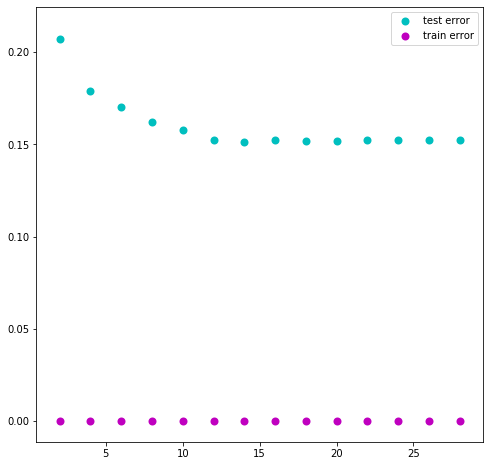

In [46]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
colors = ['c', 'm']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Min test_err {} с {} components".format(test_err[best_test_result], n_components[best_test_result]))
print("Max test_err {} с {} components".format(test_err[worst_test_result], n_components[worst_test_result]))
print("Min train_err {} с {} components".format(train_err[best_train_result], n_components[best_train_result]))
print("Max train_err {} с {} components".format(train_err[worst_train_result], n_components[worst_train_result]))

Как и ожидалось Random Forest лучше работает где больше компонент, чем 2. В данном случае вышло, что лучший результат достигается при 14 компонентах. Однако в тоже время ошибка на тестовой выборке 15,1% всё равно больше чем 14,7 на данных без уменьшения размерности.

#### Knn

In [0]:
train_err = []
test_err = []
for n in n_components:
  pca = PCA(n_components=n)
  pca.fit(X)
  X_nd_train = pca.transform(X_train)
  X_nd_test = pca.transform(X_test)
  trn_e, tst_e = run_classifier(knn, X_nd_train, y_train, X_nd_test, y_test)
  train_err.append(trn_e)
  test_err.append(tst_e)

Min test_err 0.15619578976979698 с 26 components
Max test_err 0.18859299545220123 с 2 components
Min train_err 0.14851057416989 с 26 components
Max train_err 0.17974581805395087 с 2 components


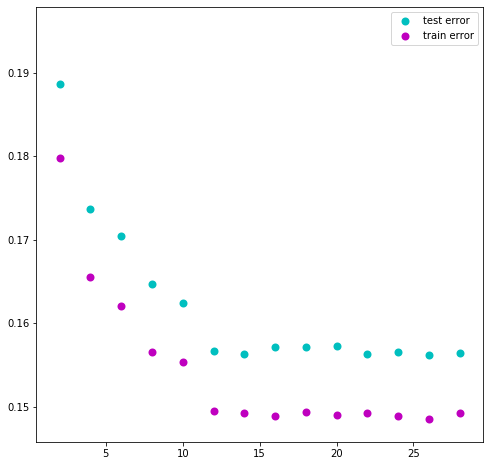

In [41]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
colors = ['c', 'm']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Min test_err {} с {} components".format(test_err[best_test_result], n_components[best_test_result]))
print("Max test_err {} с {} components".format(test_err[worst_test_result], n_components[worst_test_result]))
print("Min train_err {} с {} components".format(train_err[best_train_result], n_components[best_train_result]))
print("Max train_err {} с {} components".format(train_err[worst_train_result], n_components[worst_train_result]))

15,7% - Knn до уменьшения размерности, при уменьшении размерности с 30 компонент до 26, ошибка немного понижается и составляет 15,6%

#### SVM

In [0]:
train_err = []
test_err = []
for n in n_components:
  pca = PCA(n_components=n)
  pca.fit(X)
  X_nd_train = pca.transform(X_train)
  X_nd_test = pca.transform(X_test)
  trn_e, tst_e = run_classifier(svc, X_nd_train, y_train, X_nd_test, y_test)
  train_err.append(trn_e)
  test_err.append(tst_e)

print(test_err)

[0.1827558722865582, 0.17197243190022973, 0.16840920812039945, 0.16287683435697875, 0.15856345820244738, 0.15197618266210325, 0.15178864456842797, 0.15253879694312908, 0.15279666182193258, 0.1528669886070608, 0.15326550705612077, 0.1531014112241549, 0.15324206479441135, 0.15305452670073608]


Min test_err 0.15178864456842797 с 14 components
Max test_err 0.1827558722865582 с 2 components
Min train_err 0.14770683679107852 с 14 components
Max train_err 0.18332244938966194 с 2 components


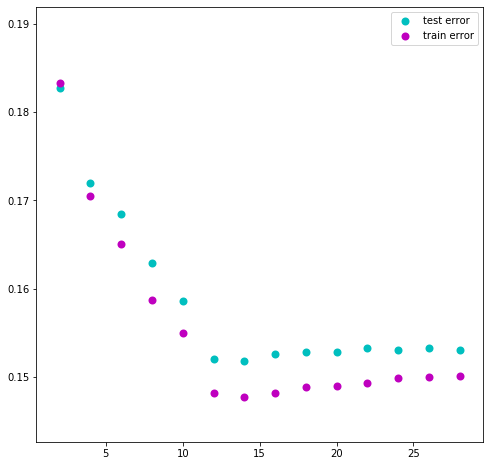

In [0]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
colors = ['c', 'm']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Min test_err {} с {} components".format(test_err[best_test_result], n_components[best_test_result]))
print("Max test_err {} с {} components".format(test_err[worst_test_result], n_components[worst_test_result]))
print("Min train_err {} с {} components".format(train_err[best_train_result], n_components[best_train_result]))
print("Max train_err {} с {} components".format(train_err[worst_train_result], n_components[worst_train_result]))

15,3% - SVM до уменьшения размерности, после уменьшение оптимальное значение 15,17% при 14 компонентах.

До этого мы выводили вклад каждой фичи:
Feature importance:
10. feature 'Humidity3pm' (0.182993)
11. feature 'Pressure' (0.087911)
6. feature 'WindGustSpeed' (0.074168)
9. feature 'Humidity9am' (0.071284)
2. feature 'MaxTemp' (0.070489)
1. feature 'MinTemp' (0.069733)
5. feature 'Sunshine' (0.063747)
3. feature 'Rainfall' (0.056782)
8. feature 'WindSpeed3pm' (0.048807)
7. feature 'WindSpeed9am' (0.046236)
13. feature 'Cloud3pm' (0.040726)
4. feature 'Evaporation' (0.037241)
12. feature 'Cloud9am' (0.029686)
14. feature 'WindGustDir_E' (0.022261)
28. feature 'WindGustDir_WNW' (0.005962)
22. feature 'WindGustDir_S' (0.005927)
18. feature 'WindGustDir_NE' (0.005787)
21. feature 'WindGustDir_NW' (0.005148)
23. feature 'WindGustDir_SE' (0.005136)
29. feature 'WindGustDir_WSW' (0.005128)
26. feature 'WindGustDir_SW' (0.004840)
27. feature 'WindGustDir_W' (0.004826)
30. feature 'RainToday' (0.004773)
24. feature 'WindGustDir_SSE' (0.004725)
20. feature 'WindGustDir_NNW' (0.004708)
19. feature 'WindGustDir_NNE' (0.004636)
25. feature 'WindGustDir_SSW' (0.004429)
15. feature 'WindGustDir_ENE' (0.003941)
16. feature 'WindGustDir_ESE' (0.003654)
17. feature 'WindGustDir_N' (0.003590)

И если посчитать количество фич, у которых вклад доходит до сотых, то их как раз окажется 14 штук (начиная с Humidity3pm до WindGustDir_E)

Таким образом, при уменьшении размерности на наших данных теряется информация и ошибка возрастает в сравнение с тем показателем, что был до уменьшения данных дл Random Forest классификатора. Для SVM и Knn ошибка уменьшается незначительно -- на пару тысячных.